<center><b><h2>Emotion Detection in Twitter Data using NLP Techniques</h2></b></center>
<u>PROBLEM</u>: <br>
You have received a dataset of Twitter posts (tweets) labelled with specific
emotions. Your task is to develop an emotion detection model using natural
language processing (NLP) techniques. The goal is to accurately classify tweets into
different emotion categories such as joy, sadness, anger, fear, or surprise.<br>
To accomplish this, you need to follow the below steps:<br>
• Data Preprocessing:<br>
• Feature Extraction:<br>
• Model Building and Evaluation:<br>
• Evaluate the model's performance

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN

In [65]:
from keras.callbacks import EarlyStopping

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = pd.read_csv('/content/drive/MyDrive/datasets/tweet_emotions.csv')

# Data Exploration

In [69]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [71]:
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [72]:
data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [73]:
data['tweet_id'].nunique()

40000

In [74]:
data['content'].nunique()

39827

# Data Preprocessing

In [75]:
# Remove duplicates based on the 'content' column
data = data.drop_duplicates(subset='content', keep='first')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39827 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   39827 non-null  int64 
 1   sentiment  39827 non-null  object
 2   content    39827 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [77]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
#stemming might be a reasonable choice, as tweets often contain informal language

In [79]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    processed_text = ' '.join(tokens)

    return processed_text

In [80]:
data['processed_content'] = data['content'].apply(preprocess_text)

In [81]:
data

,tweet_id,sentiment,content,processed_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylu know listenin bad habit earlier star...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,dannycastillo want trade someon houston ticket...
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,johnlloydtaylor
39996,1753919001,love,Happy Mothers Day All my love,happi mother day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,happi mother day mommi woman man long your mom...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley wassup beauti follow peep new hit sin...


## Padding and tokenizing the preprocessed text

In [82]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_content'])
sequences = tokenizer.texts_to_sequences(data['processed_content'])
x = pad_sequences(sequences)

## Encode labels using LabelEncoder

In [83]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])

# Splitting data

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Creation

### LSTM

In [85]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=x.shape[1]))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


In [86]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
checkpoint = EarlyStopping(patience=5)

#RNN

In [100]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=x.shape[1]))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(20,activation='relu'))
rnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [101]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model

### LSTM

In [88]:
# model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
epochs = 20
history = model.fit(x_train, y_train, epochs = epochs, validation_split=0.1, callbacks = checkpoint)

Epoch 1/20
897/897 [==============================] - 102s 110ms/step - loss: 2.0547 - accuracy: 0.2826 - val_loss: 1.9248 - val_accuracy: 0.3448
Epoch 2/20
897/897 [==============================] - 111s 124ms/step - loss: 1.7677 - accuracy: 0.4047 - val_loss: 1.9376 - val_accuracy: 0.3624
Epoch 3/20
897/897 [==============================] - 106s 119ms/step - loss: 1.3570 - accuracy: 0.5517 - val_loss: 2.1962 - val_accuracy: 0.3188
Epoch 4/20
897/897 [==============================] - 99s 110ms/step - loss: 0.9481 - accuracy: 0.7076 - val_loss: 2.4813 - val_accuracy: 0.3097
Epoch 5/20
897/897 [==============================] - 91s 101ms/step - loss: 0.6705 - accuracy: 0.7951 - val_loss: 2.6854 - val_accuracy: 0.2846
Epoch 6/20
897/897 [==============================] - 93s 104ms/step - loss: 0.5084 - accuracy: 0.8445 - val_loss: 3.0923 - val_accuracy: 0.2827


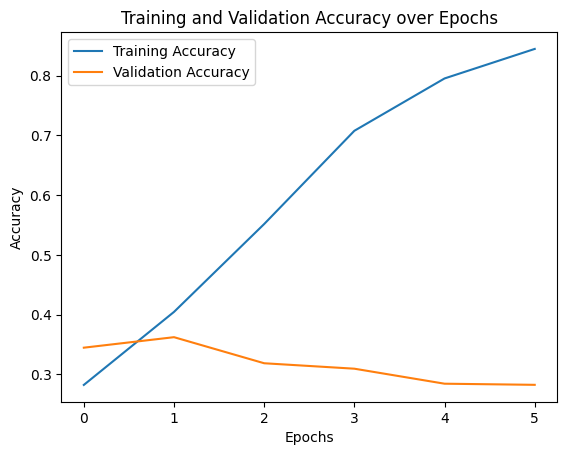

In [89]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

### RNN

In [102]:
history = rnn_model.fit(x_train, y_train, epochs = epochs, validation_split=0.1, callbacks = checkpoint)

Epoch 1/20
897/897 [==============================] - 83s 91ms/step - loss: 2.1701 - accuracy: 0.2340 - val_loss: 2.0466 - val_accuracy: 0.3094
Epoch 2/20
897/897 [==============================] - 80s 89ms/step - loss: 1.8454 - accuracy: 0.3689 - val_loss: 2.0694 - val_accuracy: 0.2968
Epoch 3/20
897/897 [==============================] - 81s 90ms/step - loss: 1.1976 - accuracy: 0.6128 - val_loss: 2.5185 - val_accuracy: 0.2818
Epoch 4/20
897/897 [==============================] - 82s 91ms/step - loss: 0.7031 - accuracy: 0.7830 - val_loss: 2.9023 - val_accuracy: 0.2482
Epoch 5/20
897/897 [==============================] - 84s 94ms/step - loss: 0.4493 - accuracy: 0.8638 - val_loss: 3.3302 - val_accuracy: 0.2479
Epoch 6/20
897/897 [==============================] - 84s 94ms/step - loss: 0.3219 - accuracy: 0.9008 - val_loss: 3.5108 - val_accuracy: 0.2545


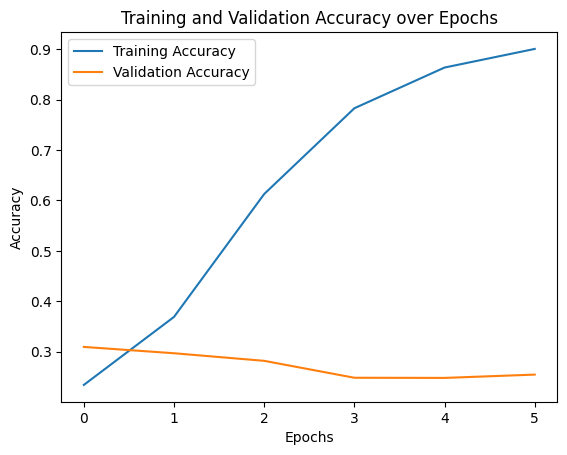

In [103]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Model Evaluation

In [90]:
results_lstm = model.evaluate(x_test, y_test)

249/249 [==============================] - 3s 10ms/step - loss: 3.1408 - accuracy: 0.2640


In [104]:
results_rnn = rnn_model.evaluate(x_test, y_test)

249/249 [==============================] - 1s 5ms/step - loss: 3.5505 - accuracy: 0.2467


In [105]:
print('LSTM :')
print(f'Test Loss: {results_lstm[0]}')
print(f'Test Accuracy: {results_lstm[1]}')

print('\n\nRNN :')
print(f'Test Loss: {results_rnn[0]}')
print(f'Test Accuracy: {results_rnn[1]}')

LSTM :
Test Loss: 3.1408448219299316
Test Accuracy: 0.26399698853492737


RNN :
Test Loss: 3.550476551055908
Test Accuracy: 0.2466733604669571


Here the LSTM model has a higher test accuracy compared to the RNN model.

In [106]:
y_pred = model.predict(x_test)

# Convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Decode labels using the LabelEncoder
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels_decoded = label_encoder.inverse_transform(y_pred_labels)

print(classification_report(y_test_labels, y_pred_labels_decoded))

249/249 [==============================] - 3s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        25
     boredom       0.00      0.00      0.00        39
       empty       0.02      0.01      0.01       173
  enthusiasm       0.02      0.02      0.02       160
         fun       0.08      0.07      0.07       391
   happiness       0.25      0.33      0.28      1034
        hate       0.21      0.24      0.23       246
        love       0.32      0.44      0.37       736
     neutral       0.34      0.37      0.35      1738
      relief       0.10      0.09      0.09       308
     sadness       0.24      0.20      0.22      1029
    surprise       0.08      0.06      0.07       409
       worry       0.32      0.27      0.29      1678

    accuracy                           0.26      7966
   macro avg       0.15      0.16      0.15      7966
weighted avg       0.25      0.26      0.26      7966



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   **Some classes have very few samples, leading to imbalanced classes. This imbalance can affect the model's ability to generalize well, especially for minority classes.**
*   **The warning about undefined precision and F1-score indicates that some classes have no predicted samples. This is likely due to the imbalanced nature of the dataset.**
*   **The overall accuracy is around 26%, which might be influenced by the dominant classes in the dataset. However, accuracy alone may not be a reliable metric, especially in the presence of imbalanced classes.**

*   **Hyper parameter tuning may improve the performance of the model but not done here coz of time constraints.**

